In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("apples_pears.csv")

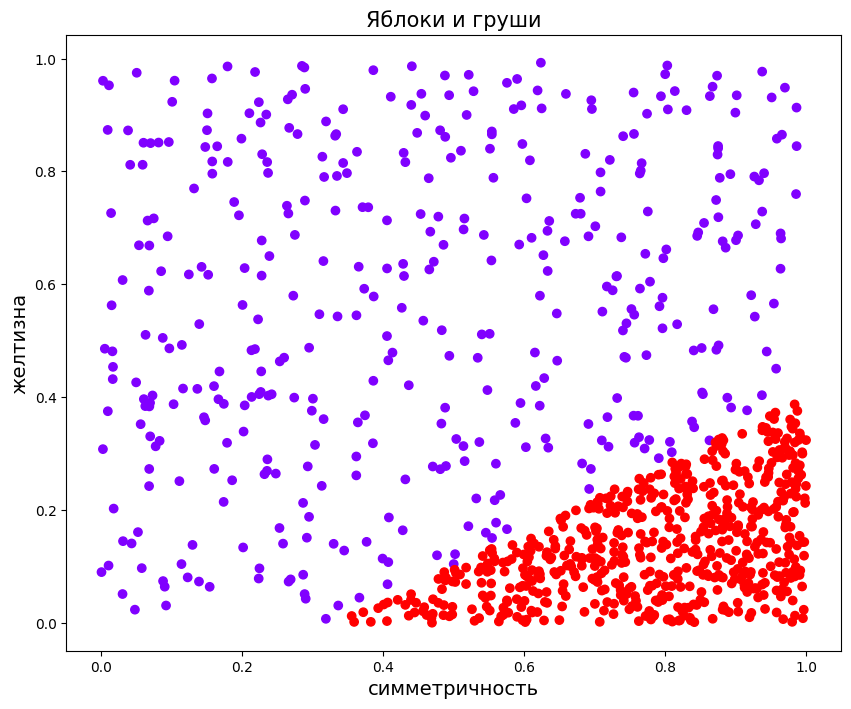

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

In [5]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [7]:
X[:,:10]

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       ...,
       [0.92721921, 0.13498618],
       [0.01582991, 0.48132194],
       [0.96796389, 0.30857107]])

In [8]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))

In [9]:
neuron

In [10]:
neuron.predict([[1,1]])

1/1 [==============================] - 0s 144ms/step


array([[0.5615846]], dtype=float32)

32/32 [==============================] - 0s 2ms/step
[[ True]
 [ True]
 [ True]
 [False]
 [ True]]


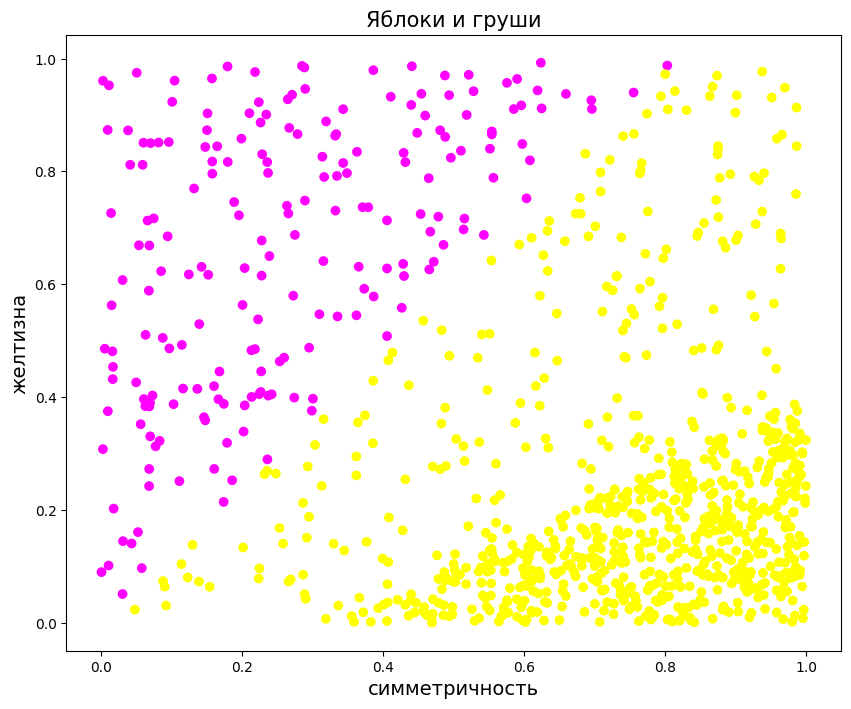

In [21]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
print(y_pred[:5])
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

In [22]:
from keras import optimizers
import tensorflow as tf
sgd = tf.keras.optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.1551 - accuracy: 0.8012 - val_loss: 0.1474 - val_accuracy: 0.8300
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.8388 - val_loss: 0.1417 - val_accuracy: 0.8700
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.8587 - val_loss: 0.1370 - val_accuracy: 0.8750
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1399 - accuracy: 0.8675 - val_loss: 0.1327 - val_accuracy: 0.8900
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.8750 - val_loss: 0.1288 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1323 - accuracy: 0.8850 - val_loss: 0.1252 - val_accuracy: 0.9050
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 0.8888 - val_loss: 0.1219 - val_accuracy: 0.9050
Epoch 8/100
3

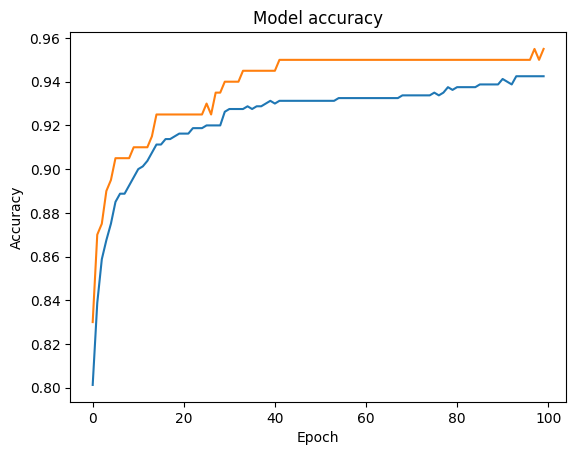

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()

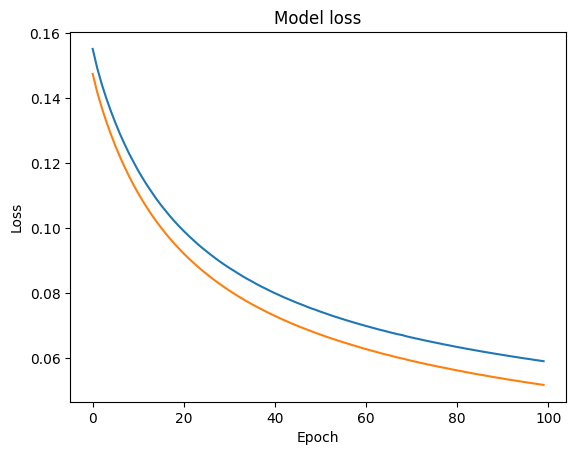

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 1ms/step


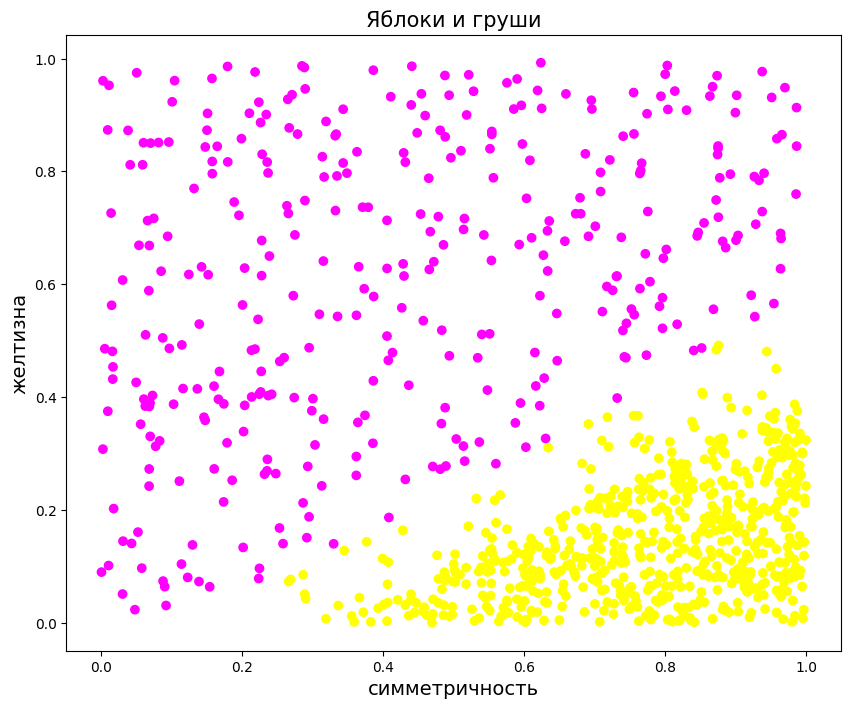

In [25]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

# Задание *1*

In [26]:
from keras import optimizers
import tensorflow as tf
sgd = tf.keras.optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=1)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.0545 - accuracy: 0.9475 - val_loss: 0.0408 - val_accuracy: 0.9650
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9525 - val_loss: 0.0337 - val_accuracy: 0.9650
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0398 - accuracy: 0.9563 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9575 - val_loss: 0.0326 - val_accuracy: 0.9950
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9638 - val_loss: 0.0262 - val_accuracy: 0.9900
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9600 - val_loss: 0.0235 - val_accuracy: 0.9800
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.9613 - val_loss: 0.0223 - val_accuracy: 0.9750
Epoch 8/100
3

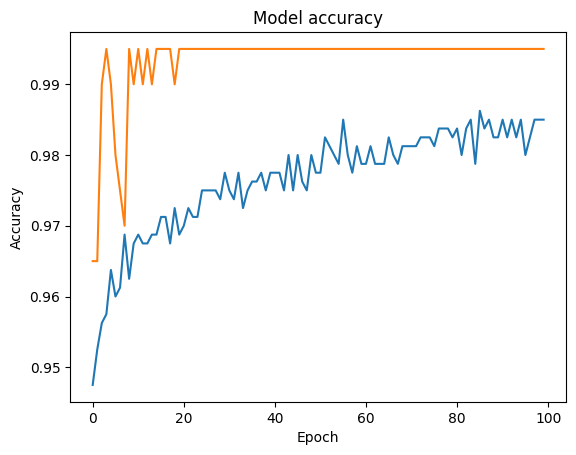

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()

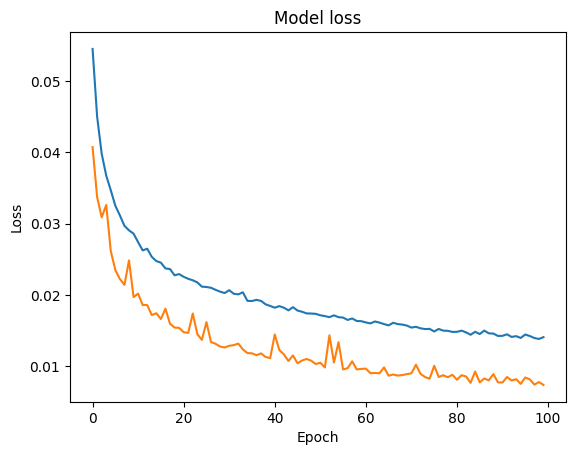

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 1ms/step


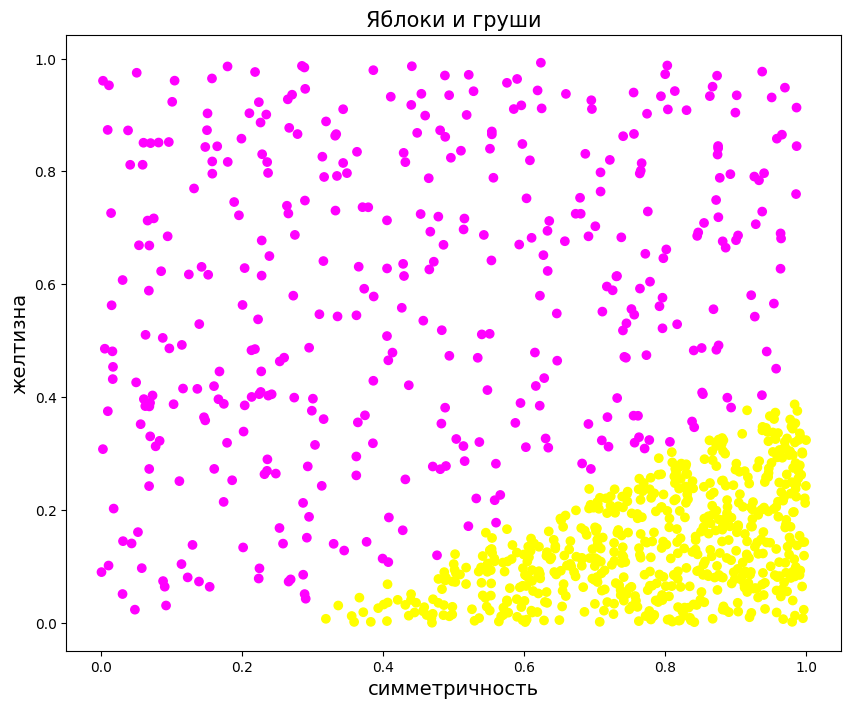

In [29]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

In [30]:
from keras import optimizers
import tensorflow as tf
sgd = tf.keras.optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=200, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9837 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9837 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9837 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9837 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9837 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9837 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9837 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 8/200
3

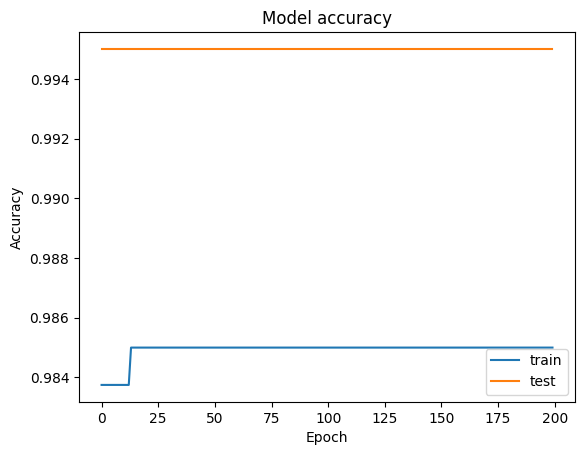

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'])
plt.show()

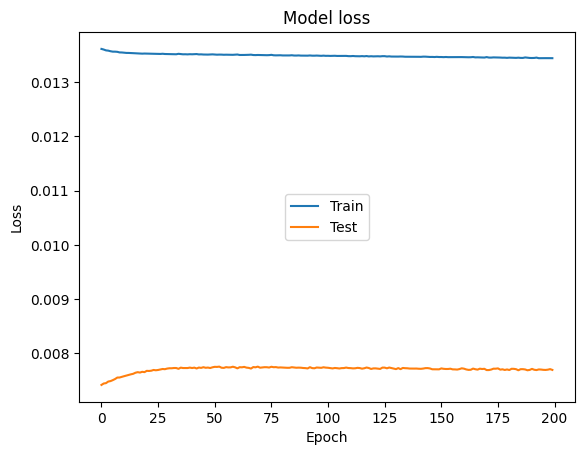

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center')
plt.show()

32/32 [==============================] - 0s 1ms/step


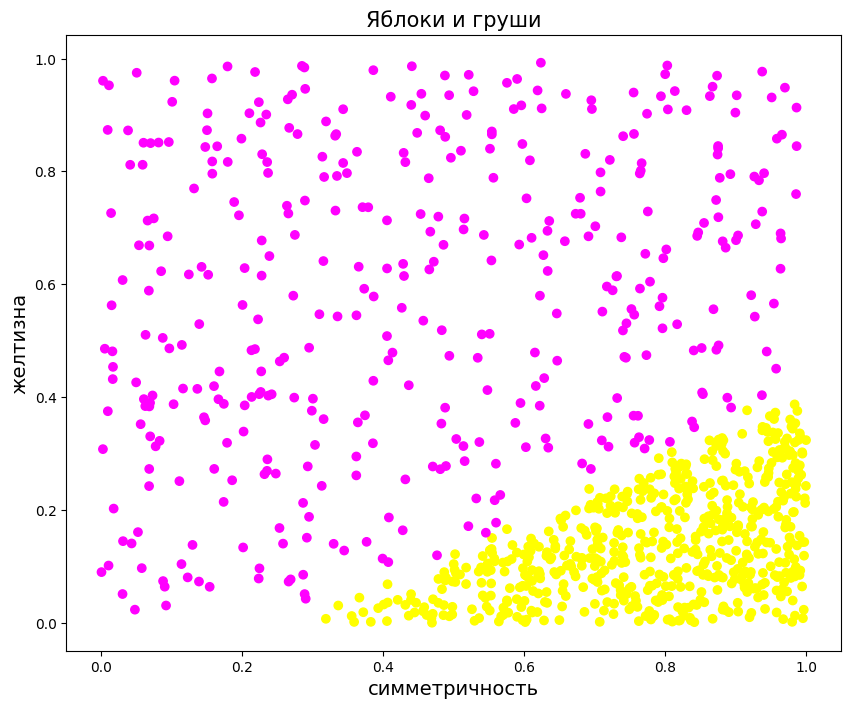

In [34]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

In [35]:
from keras import optimizers
import tensorflow as tf
Adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
neuron.compile(loss='mean_squared_error', optimizer=Adam, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.0135 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 8/100
3

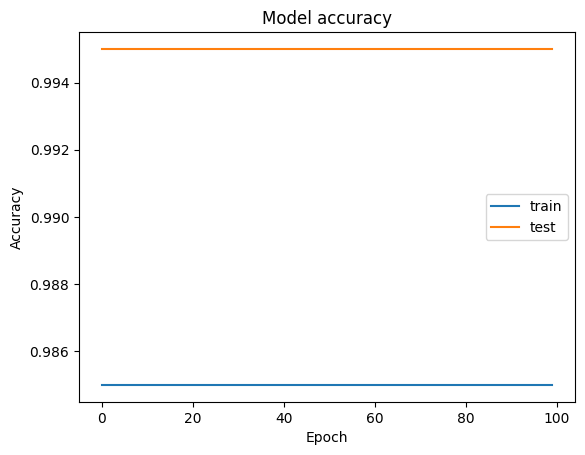

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'])
plt.show()

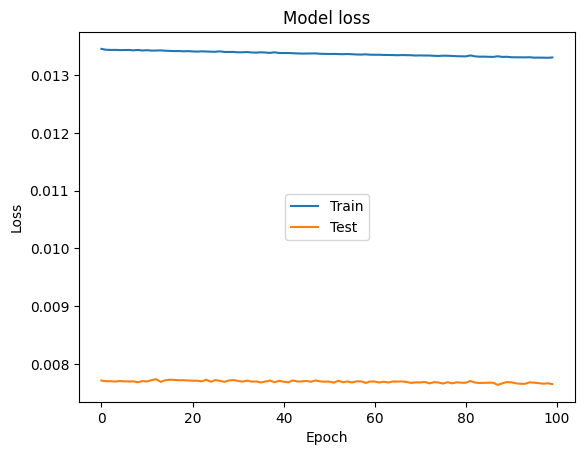

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center')
plt.show()

32/32 [==============================] - 0s 1ms/step


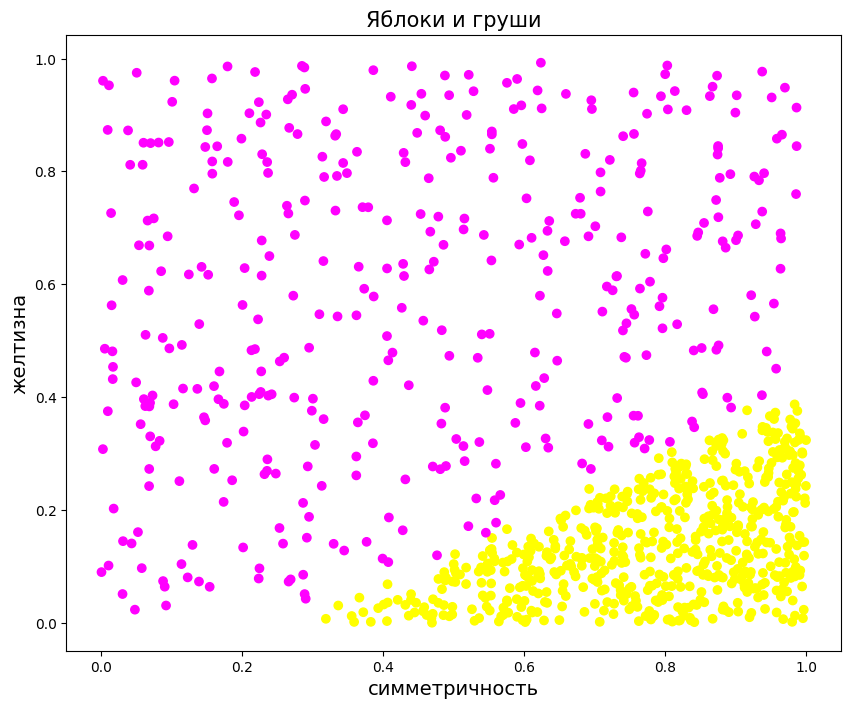

In [38]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

In [39]:
from keras import optimizers
import tensorflow as tf
Rmsp = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)
neuron.compile(loss='mean_squared_error', optimizer=Rmsp, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 2s 33ms/step - loss: 0.0133 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 2/100
32/32 [==============================] - 0s 11ms/step - loss: 0.0133 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0133 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0133 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.9850 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0133 - accuracy: 0.9850 - val_loss: 0.0076 - val_accuracy: 0.9950
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0133 - accuracy: 0.9850 - val_loss: 0.0076 - val_accuracy: 0.9950
Epoch 8/1

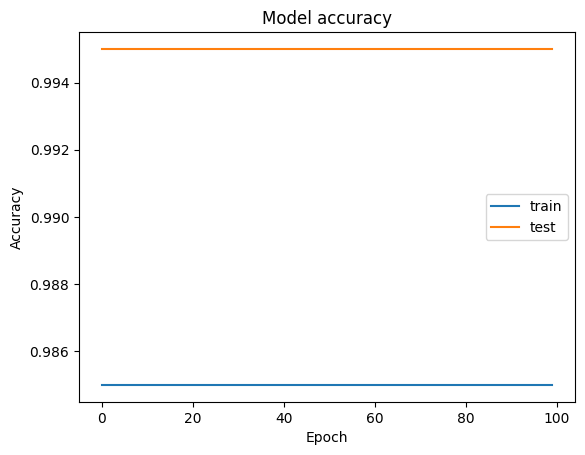

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'])
plt.show()

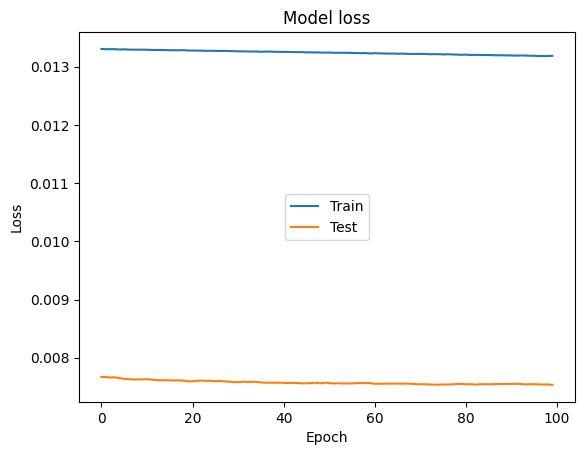

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center')
plt.show()

32/32 [==============================] - 0s 3ms/step


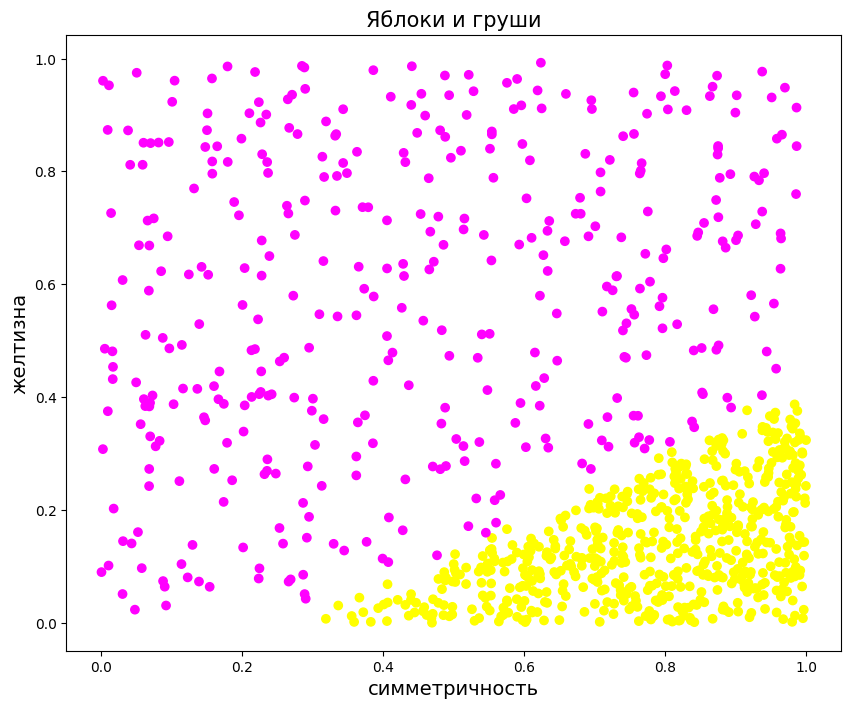

In [42]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

# Задание **2**

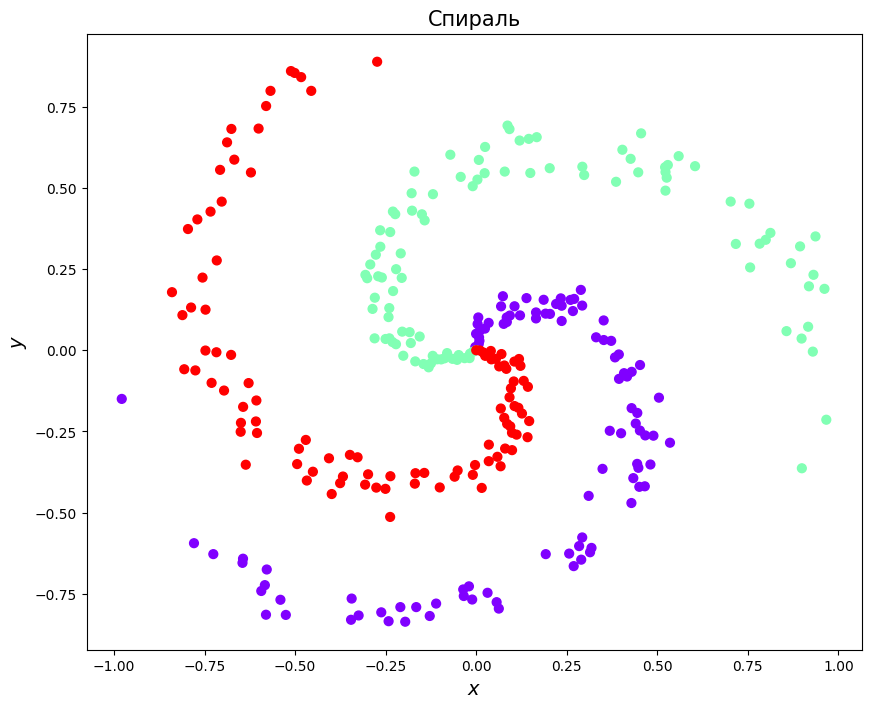

In [43]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [44]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


In [45]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))
sgd = tf.keras.optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.0001)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 1s 66ms/step - loss: 0.6255 - accuracy: 0.3083 - val_loss: 2.1326 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 18ms/step - loss: 0.6255 - accuracy: 0.3125 - val_loss: 2.1324 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.6255 - accuracy: 0.3125 - val_loss: 2.1322 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 20ms/step - loss: 0.6254 - accuracy: 0.3125 - val_loss: 2.1319 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 0.6253 - accuracy: 0.3167 - val_loss: 2.1316 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 19ms/step - loss: 0.6253 - accuracy: 0.3167 - val_loss: 2.1313 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 0.6252 - accuracy: 0.3125 - val_loss: 2.1310 - val_accuracy: 0.0

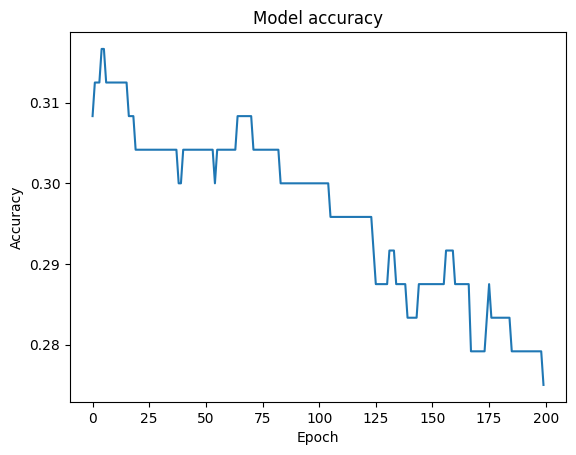

In [46]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [47]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))
sgd = tf.keras.optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=1)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 1s 62ms/step - loss: 0.5683 - accuracy: 0.4250 - val_loss: 1.3188 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 13ms/step - loss: 0.5089 - accuracy: 0.4167 - val_loss: 1.2215 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.4955 - accuracy: 0.4167 - val_loss: 1.2964 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4792 - accuracy: 0.5000 - val_loss: 1.4788 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 0.4655 - accuracy: 0.5708 - val_loss: 1.4840 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4616 - accuracy: 0.5833 - val_loss: 1.4379 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 21ms/step - loss: 0.4588 - accuracy: 0.5750 - val_loss: 1.3727 - val_accuracy: 0.0

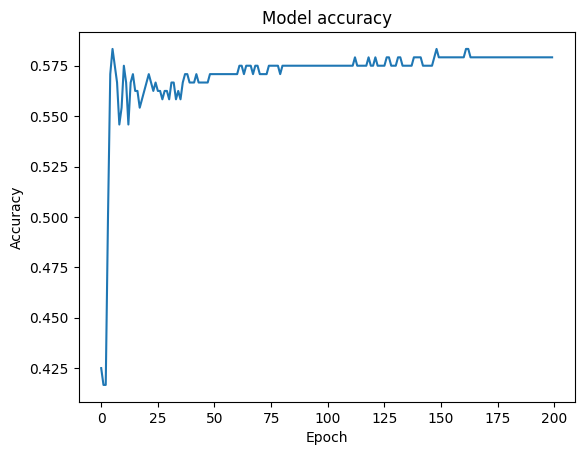

In [48]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [49]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))
sgd = tf.keras.optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=1)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 61ms/step - loss: 0.5406 - accuracy: 0.4458 - val_loss: 1.8987 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5072 - accuracy: 0.4333 - val_loss: 1.5253 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.4978 - accuracy: 0.4167 - val_loss: 1.5503 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4799 - accuracy: 0.5125 - val_loss: 1.6471 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4697 - accuracy: 0.5458 - val_loss: 1.6592 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4680 - accuracy: 0.5625 - val_loss: 1.5970 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.4643 - accuracy: 0.5708 - val_loss: 1.4879 - val_accuracy: 0.0

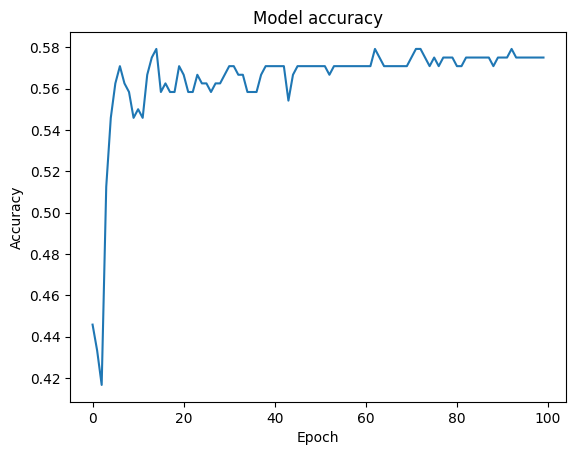

In [50]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [52]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))
Adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
neuron.compile(loss='mean_squared_error', optimizer=Adam, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 1s 110ms/step - loss: 0.5748 - accuracy: 0.6375 - val_loss: 1.9957 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 25ms/step - loss: 0.5740 - accuracy: 0.6417 - val_loss: 1.9944 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.5733 - accuracy: 0.6458 - val_loss: 1.9930 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 30ms/step - loss: 0.5727 - accuracy: 0.6417 - val_loss: 1.9917 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 40ms/step - loss: 0.5720 - accuracy: 0.6417 - val_loss: 1.9904 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 49ms/step - loss: 0.5713 - accuracy: 0.6458 - val_loss: 1.9892 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 58ms/step - loss: 0.5706 - accuracy: 0.6458 - val_loss: 1.9880 - val_accuracy: 0.

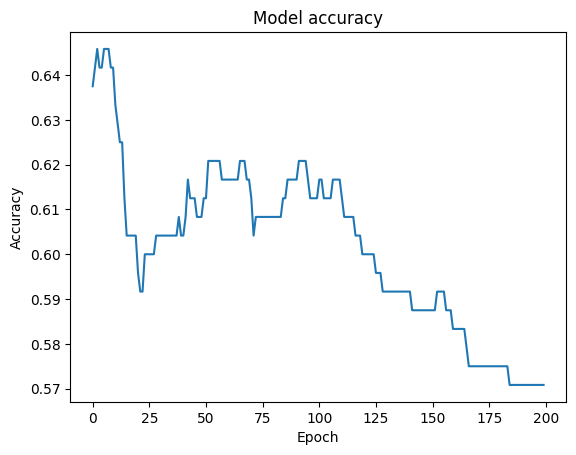

In [53]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [55]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))
Rmsp = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)
neuron.compile(loss='mean_squared_error', optimizer=Rmsp, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=200, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 1s 64ms/step - loss: 0.6238 - accuracy: 0.2208 - val_loss: 2.5047 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 0.6227 - accuracy: 0.2083 - val_loss: 2.5019 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 0.6218 - accuracy: 0.2042 - val_loss: 2.4995 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 0.6210 - accuracy: 0.2000 - val_loss: 2.4976 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6203 - accuracy: 0.1875 - val_loss: 2.4956 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6196 - accuracy: 0.1917 - val_loss: 2.4939 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 19ms/step - loss: 0.6190 - accuracy: 0.1958 - val_loss: 2.4923 - val_accuracy: 0.0

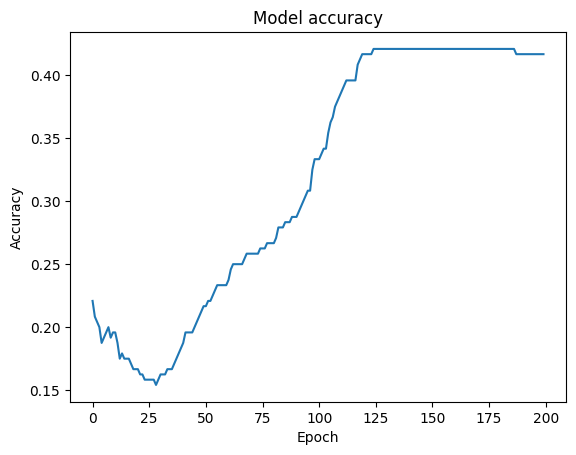

In [56]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()